In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import time

1. В выполненной работе добавьте замер времени обучения каждой модели

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv",
                   index_col=0)
X = data.x
X = pd.DataFrame(X)
y = data.y

start = time.time()
linear = LinearRegression().fit(X,y)
gen_time = time.time()-start
print(f'Линейная регрессия: {gen_time}')

Линейная регрессия: 0.03191566467285156


In [5]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)

start = time.time()
poly_2d = LinearRegression().fit(X_2, y)
print(f'Полиномиальная регрессия: {time.time()-start}')

Полиномиальная регрессия: 0.017057180404663086


In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

start = time.time()
logistic = LogisticRegression().fit(X, y)
print(f'Логистическая регрессия: {time.time()-start}')

Логистическая регрессия: 0.01382303237915039


In [6]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

start = time.time()
LogisticRegression().fit(X_3, y)
print(f'Полиномиальная логистическая регрессия: {time.time()-start}')

Полиномиальная логистическая регрессия: 0.005551338195800781


In [8]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

start = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
print(f'Линейная регрессия на реальных данных: {time.time()-start}')

Линейная регрессия на реальных данных: 0.023992538452148438


In [9]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
start = time.time()
reg_kc_multiple = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
print(f'Полиномиальная регрессия на реальных данных: {time.time()-start}')

Полиномиальная регрессия на реальных данных: 7.140177249908447


2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [10]:
def poly_linreg(X, y, dg, get_params=False, show=True):
    transformation = PolynomialFeatures(degree=dg)
    transformation.fit(X,y)
    X_ = transformation.transform(X)

    start = time.time()
    poly = LinearRegression().fit(X_, y)
    time_ = time.time()-start
    score_ = poly.score(X_, y) #коэффициент

    if show:
        print(f'Порядок модели: {dg}')
        print(f'Время обучения: {time.time()-start}')
        print(f'score: {poly.score(X_, y)}')

        xx = pd.DataFrame(np.linspace(min(X.x), max(X.x), 100))
        yy = linear.predict(xx)
        xx_new = transformation.transform(xx)
        yy_new = poly.predict(xx_new)
        plt.scatter(X.x, y)
        plt.plot(xx, yy_new, c='r')

    if get_params:
        return [time_, score_]

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv",
                  index_col=0)
X = pd.DataFrame(data.x)
y = data.y
data.head()

,x,y
0,96.597780,97761.592016
1,48.002892,27613.989207
2,47.939756,29410.187753
3,47.809026,15789.597531
4,69.784427,20953.383453


Порядок модели: 5
Время обучения: 0.01833796501159668
score: 0.9217478060447024


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


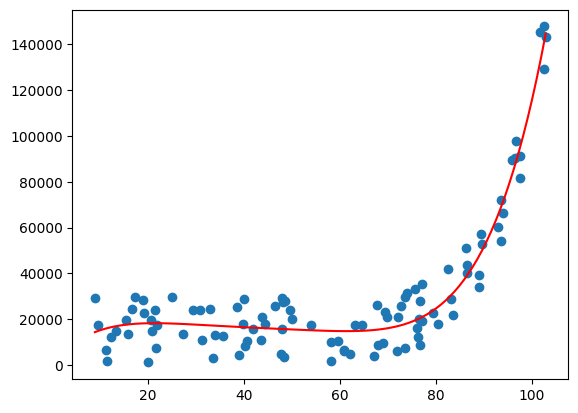

In [12]:
poly_linreg(X, y, 5)

Порядок модели: 10
Время обучения: 0.003194570541381836
score: 0.9232002062571606


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


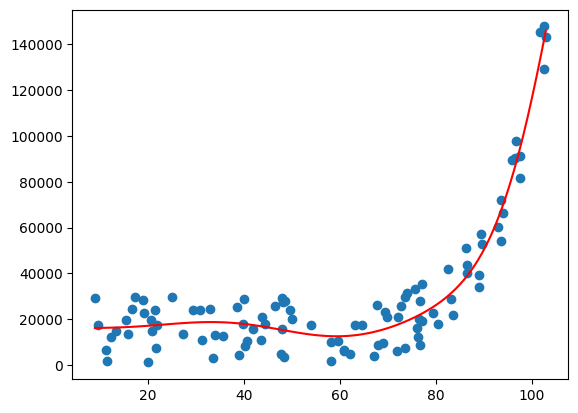

In [13]:
poly_linreg(X, y, 10)

Порядок модели: 100
Время обучения: 0.010842561721801758
score: 0.7924620004439387


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


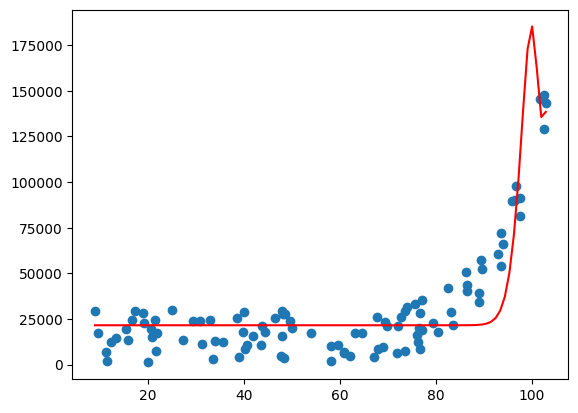

In [14]:
poly_linreg(X, y, 100)

### 3. То же самое проделайте с датасетом для классификации и "King county".


In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

In [16]:
def poly_classifier(X, y, dg, get_params=False, show=True):
    transformation = PolynomialFeatures(degree=dg, include_bias=False)
    X_ = transformation.fit_transform(X)

    start = time.time()
    logistic = LogisticRegression().fit(X_, y)
    time_ = time.time()-start
    score_ = logistic.score(X_, y)

    if show:
        print(f'Порядок модели: {dg}')
        print(f'Время обучения: {time_}')
        print(f'score: {logistic.score(X_, y)}')

        xx, yy = np.meshgrid(
        np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
        np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
        XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

        Z = logistic.predict(transformation.transform(XX)).reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4)
        plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
        plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

    if get_params:
        return [time_, score_]

Порядок модели: 5
Время обучения: 0.04065108299255371
score: 0.916


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


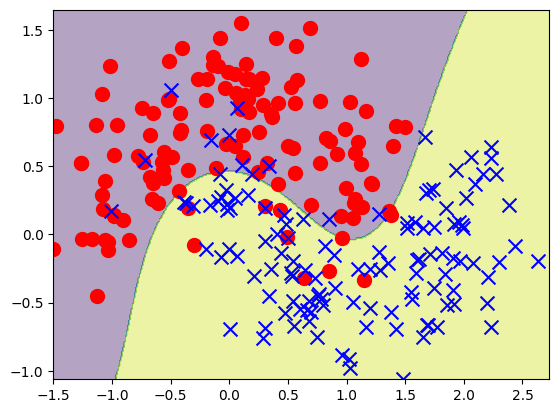

In [17]:
poly_classifier(X, y, 5)

Порядок модели: 10
Время обучения: 0.12065458297729492
score: 0.924


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


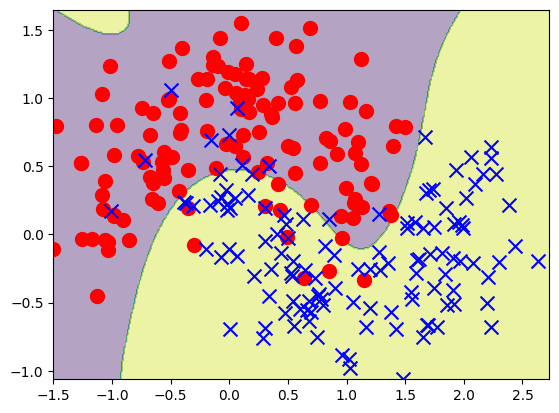

In [18]:
poly_classifier(X, y, 10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Порядок модели: 100
Время обучения: 0.042015790939331055
score: 0.5


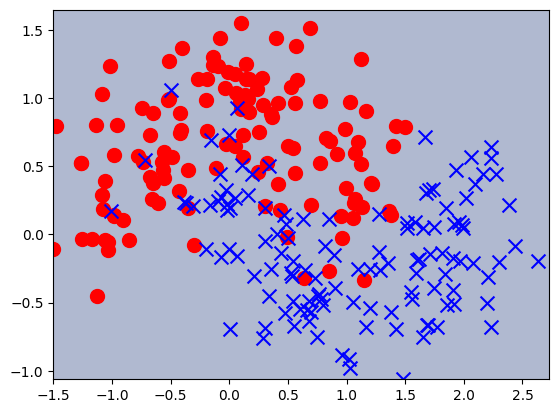

In [19]:
poly_classifier(X, y, 100)

#### 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [20]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv",
                  index_col=0)
X = pd.DataFrame(data.x)
y = data.y
gen_reg_5 = poly_linreg(X, y, 5, show=False, get_params=True)
gen_reg_10 = poly_linreg(X, y, 10, show=False, get_params=True)
gen_reg_100 = poly_linreg(X, y, 100, show=False, get_params=True)

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
class_5 = poly_classifier(X, y, 5, show=False, get_params=True)
class_10 = poly_classifier(X, y, 10, show=False, get_params=True)
class_100 = poly_classifier(X, y, 100, show=False, get_params=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
comp = {'gen_regression5': gen_reg_5,
         'gen_regression10': gen_reg_10,
         'gen_regression100':gen_reg_100,
         'gen_classiffication5': class_5,
         'gen_classiffication10': class_10,
         'gen_classiffication100': class_100,

         }
pd.DataFrame(comp, index=['Время', 'Score'])

,gen_regression5,gen_regression10,gen_regression100,gen_classiffication5,gen_classiffication10,gen_classiffication100
Время,0.004127,0.001965,0.017153,0.013672,0.090274,0.084001
Score,0.921748,0.923200,0.792462,0.916000,0.924000,0.500000
